# Introduction

> The Indian Premier League (IPL), also officially known as TATA IPL for sponsorship reasons is a professional men's Twenty20 cricket league, contested by ten teams based out of ten Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

>The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.

>The 2020 IPL season set a massive viewership record with 31.57 million average impressions and with an overall consumption increase of 23 per cent from the 2019 season

> In this notebook, we have taken dataset of players' statistics from 2008 to 2013 to analyse and visulise data. also, we will see what factors affect the sold price of players

# Feature Description


1. **PLAYER NAME** - Name of the players in IPL
2. **AGE** - Age group of each players, there are 3 groups of players, 1/2/3
3. **COUNTRY** - Home country of each players 
4. **TEAM** - IPL team they belong to
5. **PLAYING ROLE** - Players role, bowlers/batman/all-rounder/Wicket-keeper
6. **T-RUNS** - Run scored in test matches
7. **T=WKTS** - Wickets taken in test matches
8. **ODI-RUNS-S** - Run scored in ODIs
9. **ODI-SR-B** - Strike rate in ODIs
10. **ODI-WKTS** - Wickets taken in ODIs
11. **ODI-SR-BL** - Bowling strike rate in ODIs
12. **CAPTAINCY EXP** - whether the player has any captaincy experience or not
13. **RUNS-S** - Number of runs scored by a player
14. **HS** - Highest score by batman in IPL
15. **AVE** - Average runs scored by the batsman in IPL
16. **SR-B** - Batting strike rate in IPL
17. **SIXERS** - Number of six runs scored by a player in IPL
18. **RUNS-C** - Number of runs conceded by a player
19. **WKTS** - Number of wickets taken by a player in IPL
20. **AVE-BL** - Bowling average in IPL
21. **ECON** - Economy rate of a bowler
22. **SR-BL** - Bowling strike rate in IPL
23. **AUCTION YEAR** - Year of auction
24. **BASE PRICE** - Base price of a player
25. **SOLD PRICE** - Sold price of a player

# Objective of the this project:-

**> Exploratory data analysis to find insights on IPL players**

 
**> Regression model to see which factors effects a lot in players' sold price**

**> Importing liabraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

: 

# Descriptive and Exploratory data analysis

In [ ]:
df = pd.read_csv('/kaggle/input/ipledadataset/IPL IMB381IPL2013.csv', index_col=0)
df.head()

: 

In [3]:
print("shape of the dataset: ", df.shape)
print("""--------------------------------------
-----------------------------------------""")
print(df.info())

shape of the dataset:  (130, 25)
--------------------------------------
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 130
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   TEAM           130 non-null    object 
 4   PLAYING ROLE   130 non-null    object 
 5   T-RUNS         130 non-null    int64  
 6   T-WKTS         130 non-null    int64  
 7   ODI-RUNS-S     130 non-null    int64  
 8   ODI-SR-B       130 non-null    float64
 9   ODI-WKTS       130 non-null    int64  
 10  ODI-SR-BL      130 non-null    float64
 11  CAPTAINCY EXP  130 non-null    int64  
 12  RUNS-S         130 non-null    int64  
 13  HS             130 non-null    int64  
 14  AVE            130 non-null    float64
 15  SR-B           130 non-null 

In [4]:
# Dividing categorical and numerical columns
print("Columns names are as below: \n",df.columns)
print("-------------------------------------------------------------------------------")
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype in ['float64','int64']]
print("categorical columns: ", cat_col)
print("-------------------------------------------------------------------------------")
print("numerical columns: ", num_col)

Columns names are as below: 
 Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')
-------------------------------------------------------------------------------
categorical columns:  ['PLAYER NAME', 'COUNTRY', 'TEAM', 'PLAYING ROLE']
-------------------------------------------------------------------------------
numerical columns:  ['AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE']


In [5]:
df.describe().T.sort_values(by='std', ascending=False)\
.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
SOLD PRICE,130.000000,521223.076923,406807.351419,20000.000000,225000.000000,437500.000000,700000.000000,1800000.000000
BASE PRICE,130.000000,192230.769231,153097.300897,20000.000000,100000.000000,200000.000000,225000.000000,1350000.000000
ODI-RUNS-S,130.000000,2508.738462,3582.205625,0.000000,73.250000,835.000000,3523.500000,18426.000000
T-RUNS,130.000000,2166.715385,3305.646757,0.000000,25.500000,542.500000,3002.250000,15470.000000
RUNS-S,130.000000,514.246154,615.226335,0.000000,39.000000,172.000000,925.250000,2254.000000
RUNS-C,130.000000,475.523077,558.314049,0.000000,0.000000,297.000000,689.250000,1975.000000
T-WKTS,130.000000,66.530769,142.676855,0.000000,0.000000,7.000000,47.500000,800.000000
ODI-WKTS,130.000000,76.076923,111.205070,0.000000,0.000000,18.500000,106.000000,534.000000
HS,130.000000,47.430769,36.403624,0.000000,16.000000,35.500000,73.750000,158.000000
SR-B,130.000000,111.053462,35.928907,0.000000,98.237500,118.510000,129.102500,235.490000


In [6]:
# Count the values in each categorical variable
for col in cat_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())
print("----------------------------------------------------")
# count the values in each numerical variable:
for col in num_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())

total unique values in PLAYER NAME column:  130
total unique values in COUNTRY column:  10
total unique values in TEAM column:  17
total unique values in PLAYING ROLE column:  4
----------------------------------------------------
total unique values in AGE column:  3
total unique values in T-RUNS column:  103
total unique values in T-WKTS column:  60
total unique values in ODI-RUNS-S column:  117
total unique values in ODI-SR-B column:  118
total unique values in ODI-WKTS column:  74
total unique values in ODI-SR-BL column:  82
total unique values in CAPTAINCY EXP column:  2
total unique values in RUNS-S column:  115
total unique values in HS column:  73
total unique values in AVE column:  113
total unique values in SR-B column:  125
total unique values in SIXERS column:  48
total unique values in RUNS-C column:  92
total unique values in WKTS column:  51
total unique values in AVE-BL column:  88
total unique values in ECON column:  83
total unique values in SR-BL column:  82
total un

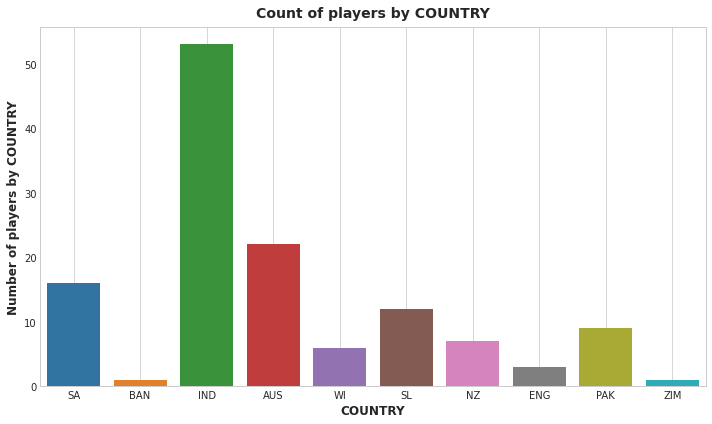

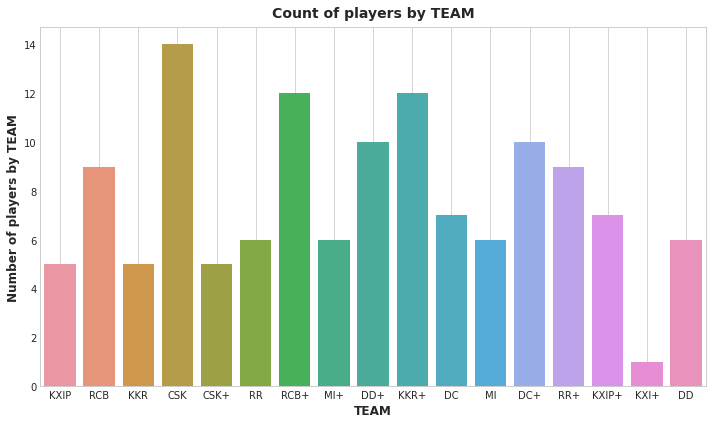

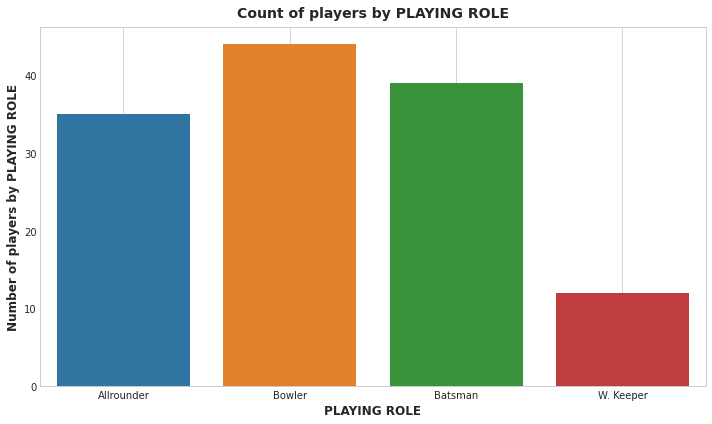

In [7]:
# count of players by country, team and playing role
cols = ['COUNTRY','TEAM','PLAYING ROLE']

def cat_plt_func(cols_list):
    for idx, col in enumerate(cols):
        plt.figure(idx, figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.title("Count of players by {}".format(col))
        plt.ylabel("Number of players by {}".format(col))
        plt.grid()
        plt.show() 

        
cat_plt_func(cols)

> Indian players are higest followed by Australia

> Bolwers are highest across the teams 

> CSK has a maximum number of players

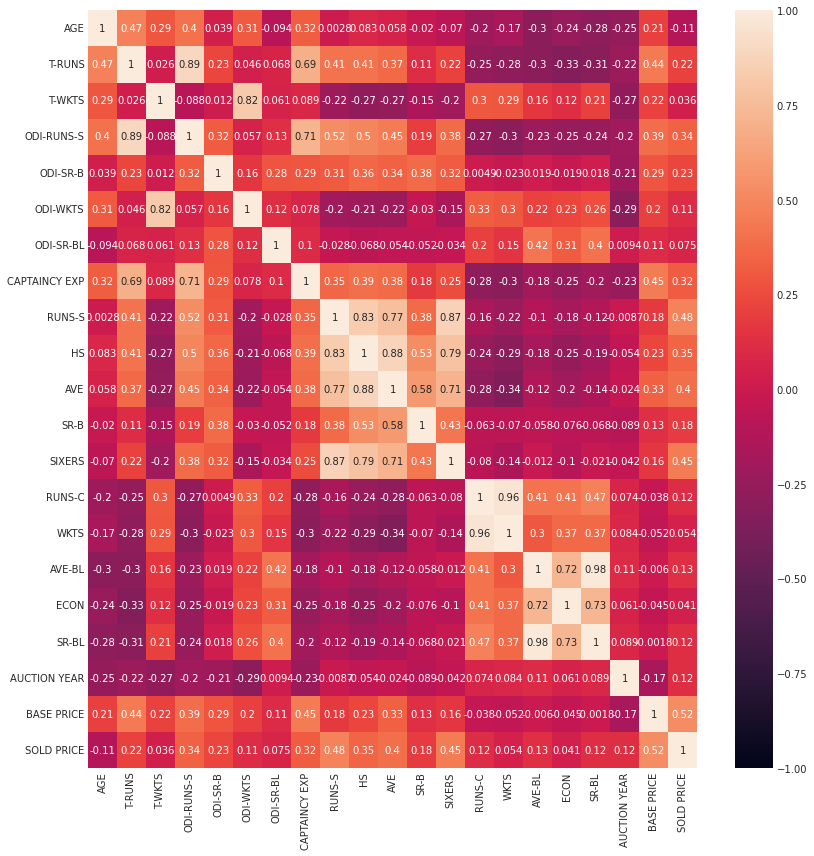

In [8]:
#heatmap of numerical columns
plt.figure(figsize=(12,12))
sns.heatmap(data=df[num_col].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

> There's high correlation between 'Run-s', 'HS', 'avg', 'sr-b' and 'sixers'

> 'Sixers' and 'Run-s' correlates with sold price

> Base price is also in correlation with sold price

> 'HS', 'AVE', 'Captaincy Exp' and 'ODI-runs-S' moderatly correlates with sold price

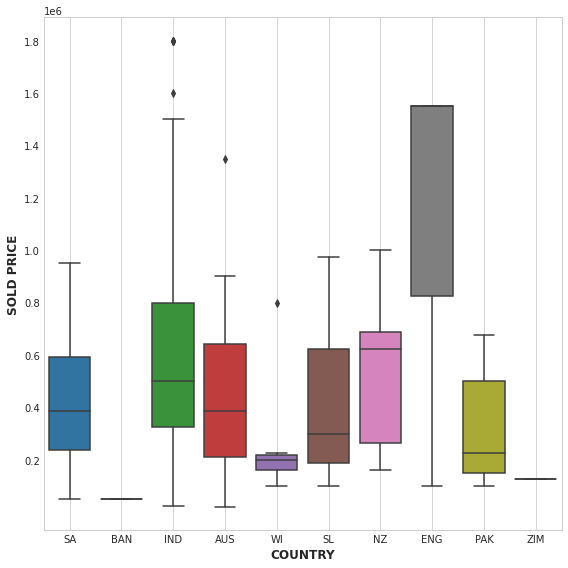

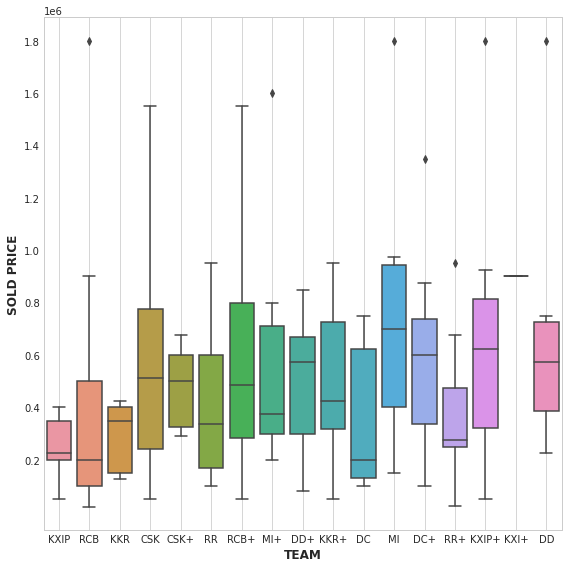

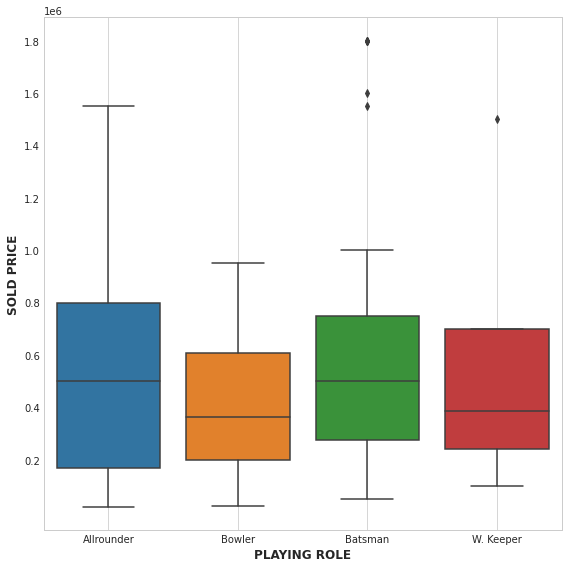

In [9]:
cols = ['COUNTRY','TEAM','PLAYING ROLE']
for idx, col in enumerate(cols):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=col, y='SOLD PRICE', data=df)
    plt.yticks(list(range(200000,2000000,200000)))
    plt.grid()
    plt.show()    

> Range of all-rounder's sold price is higher compare to others

> Batsmen sold at higher price compared to Wk or bowler

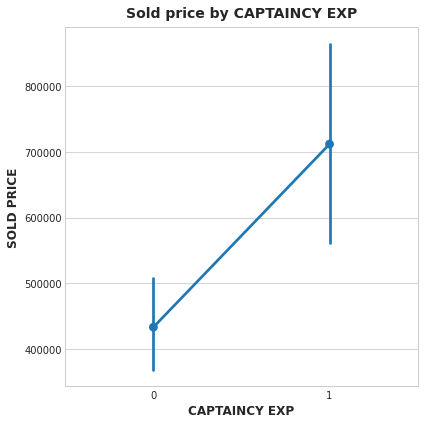

In [10]:
df['CAPTAINCY EXP'].value_counts()

def cat_func(col):
    plt.figure(figsize=(6,6))
    sns.pointplot(x=col, y='SOLD PRICE', data=df)
    plt.title("Sold price by {}".format(col))
    plt.show()

cat_func('CAPTAINCY EXP')

> players with captaincy exp are sold at high price

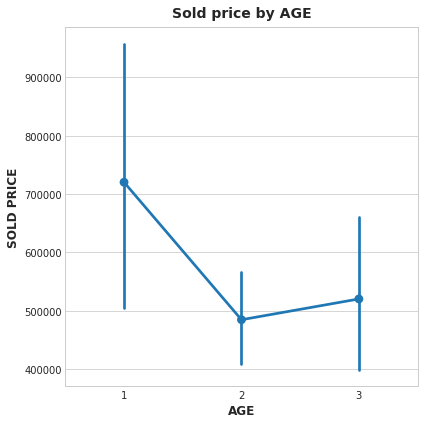

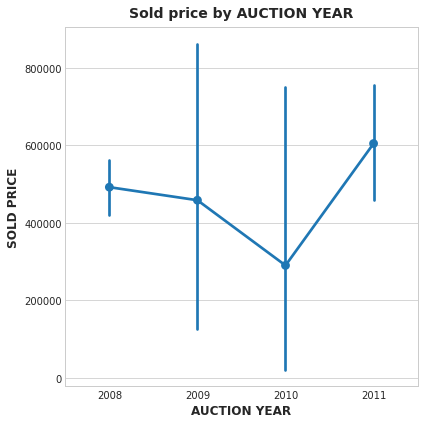

In [11]:
discreat_fea=['AGE','AUCTION YEAR']

for col in discreat_fea:
    cat_func(col)

> Age group depends on sold price while auction year is not must dependent 

> this shows players are sold on basis on their performance and experience 

> we will remove auction year from our model

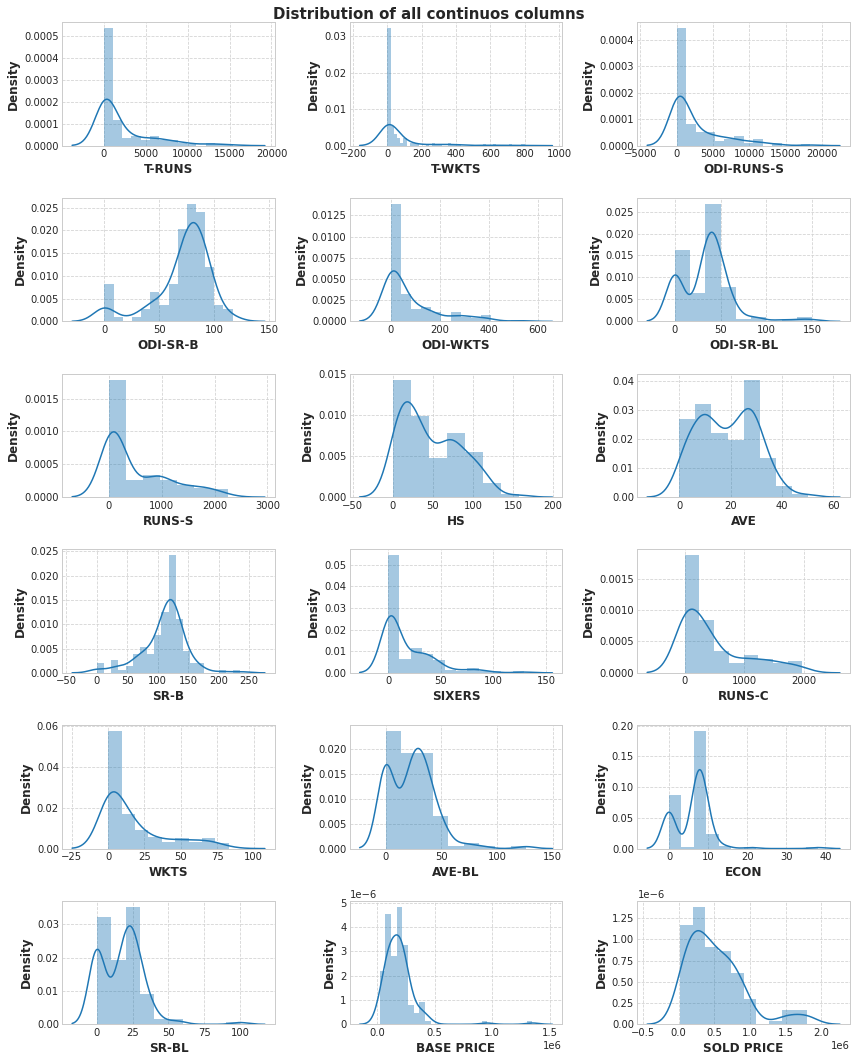

In [12]:
new_col = [col for col in num_col if df[col].nunique() > 4]
len(new_col)

fig, ax = plt.subplots(6,3, figsize=(12,15))
for idx, col in enumerate(new_col):
    sns.distplot(x=df[col], 
                 ax=ax[floor(idx/3), 
                       idx%3])
    ax[floor(idx/3), idx%3].grid(visible=True,
                                 color='lightgrey', 
                                 linestyle="--" )
    ax[floor(idx/3), idx%3].set_xlabel(col)
    
plt.suptitle("Distribution of all continuos columns", 
             fontsize=15, 
             fontweight='bold')
fig.tight_layout()
plt.show()    

> Above plots show how continous numerical features are distributed

> As we can see base price is approx normally distributed with less dispersion while sold price is widely dispersed, it says how prices are changed from base to sold

> Workflow

> next steps
plot distribution plot of base and sold price with age group and cap exp as hue

> plot scatter plot between numerical features and sold price 

> plot paiplot between most correlated cols

> prepare dataframe with avg sold price by player role and age

> find ave sold price by cap ex, age and median price by country to add new features

> add new feature using ave price by age or cap exp

> find premium price by sold-base price and add feature

> encode all the cat features to prepare final dataset

> drop players name and auction year column

> drop multi-correlated cols

In [13]:
# cross tabulation
pd.crosstab(index=df['AGE'], 
            columns=df['PLAYING ROLE'],
            values=df['SOLD PRICE'],
            aggfunc='count')

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4.0,5.0,7.0,NaN
2,25.0,21.0,29.0,11.0
3,6.0,13.0,8.0,1.0


> we can learn that more number of players are from age group of 2

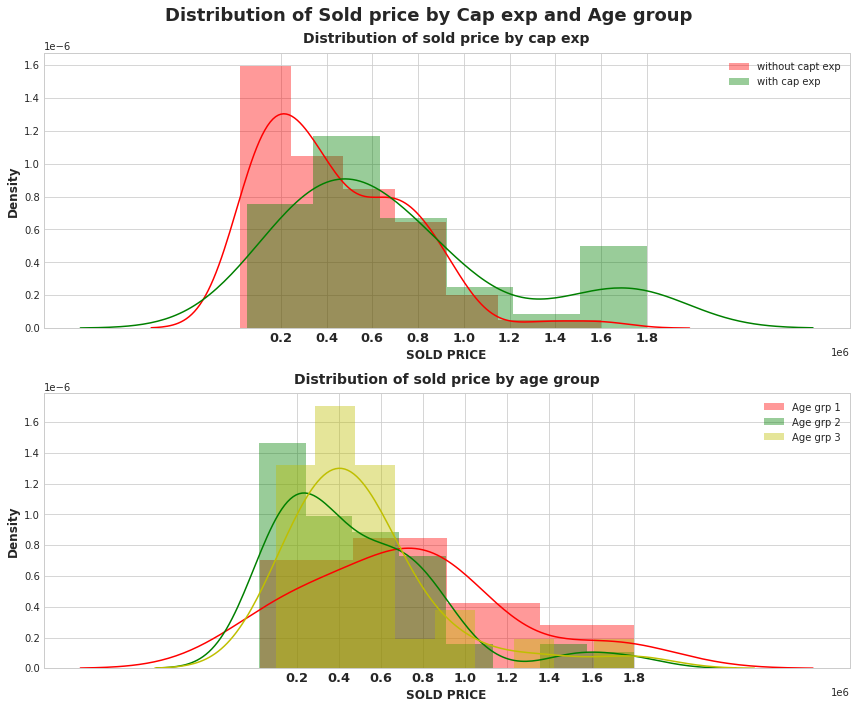

In [14]:
x = df[df['CAPTAINCY EXP'] == 0]['SOLD PRICE']

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.distplot(x=df[df['CAPTAINCY EXP'] == 0]['SOLD PRICE'], label='without capt exp', color='r')
sns.distplot(x=df[df['CAPTAINCY EXP'] == 1]['SOLD PRICE'], label='with cap exp', color='g')
plt.xlabel("SOLD PRICE")
plt.xticks(list(range(200000,2000000,200000)),fontsize=13, fontweight='bold')
plt.title("Distribution of sold price by cap exp")
plt.legend()

plt.subplot(2,1,2)
sns.distplot(x=df[df['AGE'] == 1]['SOLD PRICE'], label='Age grp 1', color='r')
sns.distplot(x=df[df['AGE'] == 2]['SOLD PRICE'], label='Age grp 2', color='g')
sns.distplot(x=df[df['AGE'] == 3]['SOLD PRICE'], label='Age grp 3', color='y')
plt.xlabel("SOLD PRICE")
plt.xticks(list(range(200000,2000000,200000)),fontsize=13, fontweight='bold')
plt.title("Distribution of sold price by age group")
plt.legend()

plt.suptitle("Distribution of Sold price by Cap exp and Age group", fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()

> From above plot 1 we can see with captaincy exp players are sold at higher price and more dispersed than without cap exp

>From plot 2 we can learn that younger players are actualy getting sold on higher prices than other age group

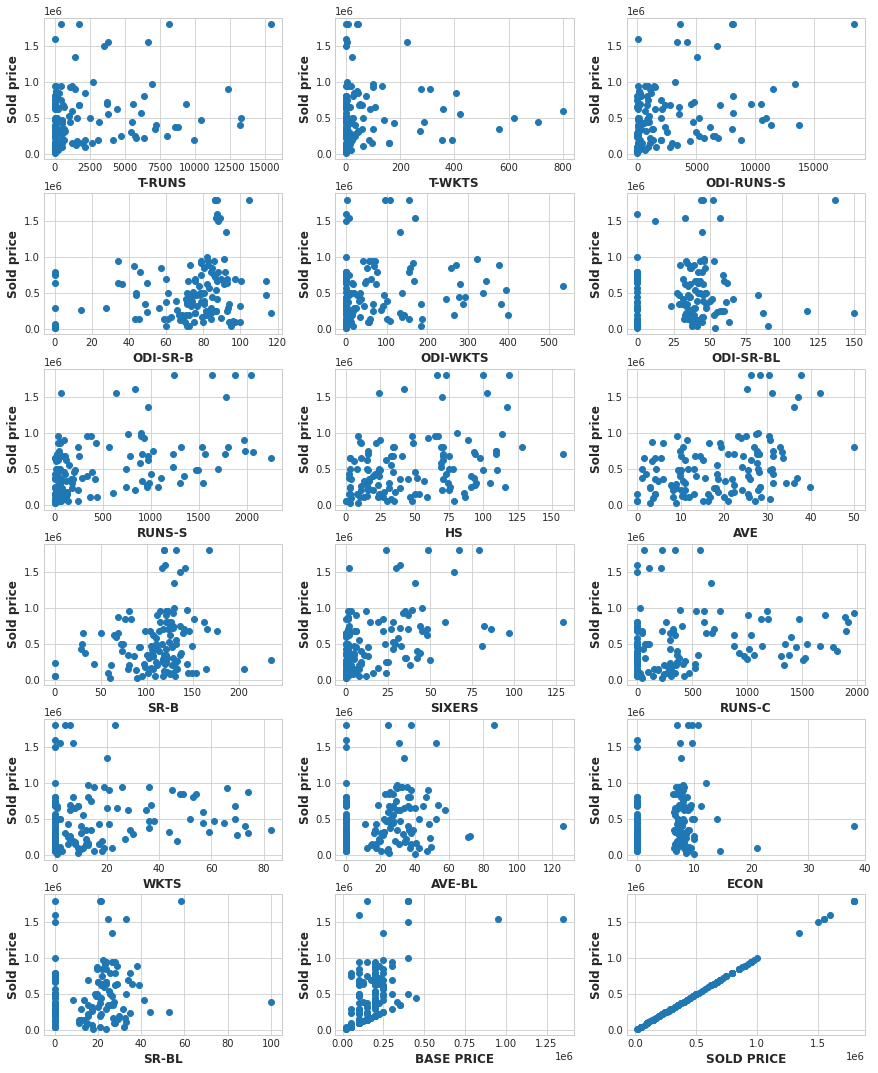

In [15]:
fig, axs = plt.subplots(6,3, figsize=(15,19),constrained_layout=True)
for idx, col in enumerate(new_col):
    axs[floor(idx/3), idx%3].scatter(np.array(df[col]), 
                                     np.array(df['SOLD PRICE']), 
                                     marker='o')
    axs[floor(idx/3), idx%3].set_xlabel(col)
    axs[floor(idx/3), idx%3].set_ylabel('Sold price')
plt.show()   

> Except ECON, SR-BL, AVE-BL, SR-B, ODI-SR-BL all others features are correlating with each other!

> We can see RUN-HS, AVE, HS are most correlating with SOLD PRICE

<Figure size 432x432 with 0 Axes>

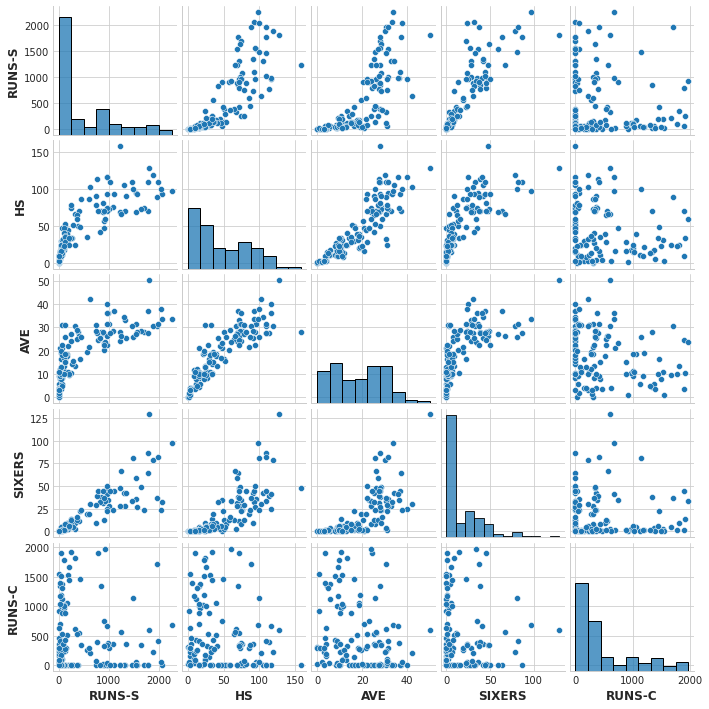

In [16]:
# pairplot among most correlating columns
data = df.loc[:,['RUNS-S','HS','AVE','SIXERS','RUNS-C']]
plt.figure(figsize=(6,6))
sns.pairplot(data, 
             height=2, 
             kind='scatter')
plt.show()

> All features highly correlate with each other, that is not good for regression model

    AGE PLAYING ROLE    SOLD PRICE
0     1   Allrounder  5.875000e+05
1     1      Batsman  1.110000e+06
2     1       Bowler  5.177143e+05
3     2   Allrounder  4.494000e+05
4     2      Batsman  6.547619e+05
5     2       Bowler  3.979310e+05
6     2    W. Keeper  4.677273e+05
7     3   Allrounder  7.666667e+05
8     3      Batsman  4.576923e+05
9     3       Bowler  4.143750e+05
10    3    W. Keeper  7.000000e+05


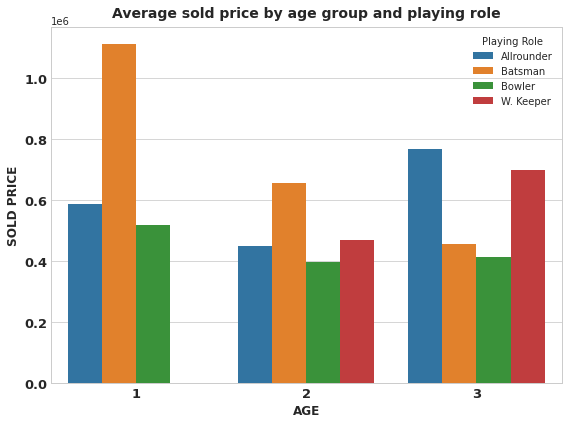

In [17]:
ave_prdf = pd.DataFrame(df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean()).reset_index()
print(ave_prdf)
plt.figure(figsize=(8,6))
sns.barplot(x='AGE', y='SOLD PRICE', hue='PLAYING ROLE', data=ave_prdf)
plt.title("Average sold price by age group and playing role")
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.legend(title='Playing Role')
plt.show()

> We can see how players are sold by age and playing role. 

> In age group 1, average sold price of batsman in higher same as in ag group 2.

> In age group 3, however allrounder are sold at higher price

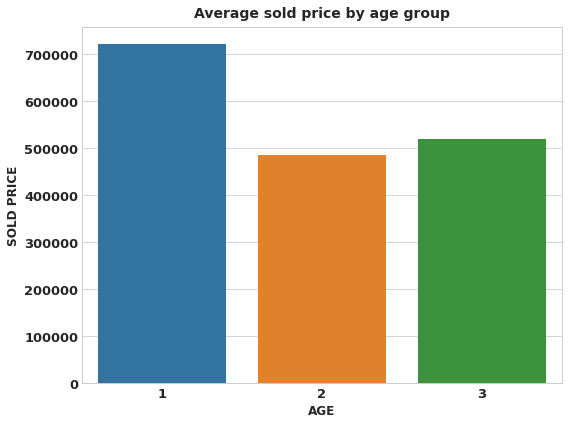

In [18]:
av_age = (df.groupby('AGE')['SOLD PRICE'].mean().reset_index()).sort_values(by='SOLD PRICE', 
                                                                            ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x='AGE', y='SOLD PRICE', data=av_age)
plt.title("Average sold price by age group")
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.show()
plt.show()

> Average sols price of age group 1 is higher

# Let's find outliers (or players who got sold at highest price)

Distribution sold price has followong property {'whiskers': [<matplotlib.lines.Line2D object at 0x7f9dbd08abd0>, <matplotlib.lines.Line2D object at 0x7f9dbd08af10>], 'caps': [<matplotlib.lines.Line2D object at 0x7f9dbd092290>, <matplotlib.lines.Line2D object at 0x7f9dbd0925d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f9dbd08a910>], 'medians': [<matplotlib.lines.Line2D object at 0x7f9dbd092950>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f9dbd092c90>], 'means': []}
--------------------------------------------------------------
--------------------------------------------------------------
Minimum sold price is 20000 and maximum sold price is 1350000
--------------------------------------------------------------
--------------------------------------------------------------
25th quantils is 225000.0 and 75th qunatile is 700000.0
--------------------------------------------------------------
--------------------------------------------------------------
Median of the sold 

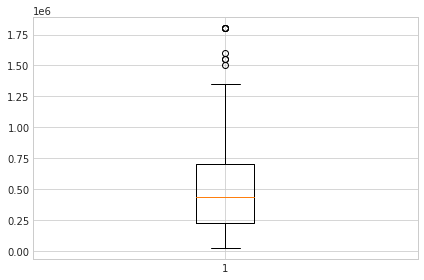

In [19]:
box = plt.boxplot(df['SOLD PRICE'])
caps = [item.get_ydata()[0] for item in box['caps']]
quantiles =[item.get_ydata()[0] for item in box['whiskers']]
median = [item.get_ydata()[0] for item in box['medians']]
outliers = [item.get_ydata() for item in box['fliers']]


print("Distribution sold price has followong property {}".format(box))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Minimum sold price is {} and maximum sold price is {}".format(caps[0],caps[1]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('25th quantils is {} and 75th qunatile is {}'.format(quantiles[0],quantiles[1]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Median of the sold price is {}'.format(median[0]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Outliears in sold price are {}".format(outliers))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

In [20]:
df[df['SOLD PRICE'] > 1350000][['PLAYER NAME','AGE','PLAYING ROLE','SOLD PRICE']].sort_values(by='SOLD PRICE', 
                                                                                              ascending=False)

,PLAYER NAME,AGE,PLAYING ROLE,SOLD PRICE
Sl.NO.,,,,
51,"Kohli, V",1,Batsman,1800000
94,"Sehwag, V",2,Batsman,1800000
112,"Tendulkar, SR",3,Batsman,1800000
128,Yuvraj Singh,2,Batsman,1800000
114,"Tiwary, SS",1,Batsman,1600000
24,"Flintoff, A",2,Allrounder,1550000
84,"Pietersen, KP",2,Batsman,1550000
16,"Dhoni, MS",2,W. Keeper,1500000


> Whoop!! Kohli was sold at highest price being of his age group back in 2013

In [21]:
lis = [row[0] for row in df[df['SOLD PRICE']> 1350000].itertuples(index=True, name=None)]
lis

[16, 24, 51, 84, 94, 112, 114, 128]

# Feature engineering

In [22]:
pre_df = df.copy()
pre_df.drop(['PLAYER NAME','AUCTION YEAR'], inplace=True, axis=1)

pre_df['PREMIUM'] = pre_df['SOLD PRICE'] - pre_df['BASE PRICE']

In [23]:
cap_df = pre_df.groupby('CAPTAINCY EXP')['SOLD PRICE'].mean().reset_index()

##################################################

combined_df = pd.merge(pre_df, cap_df, how='left', on='CAPTAINCY EXP')
combined_df.rename(columns={'SOLD PRICE_x':'SOLD PRICE',
                    'SOLD PRICE_y':'AVE PRICE BY CAP'}, inplace=True)

##################################################
coun_sp = pre_df.groupby('COUNTRY')['SOLD PRICE'].median().reset_index()
final_df = pd.merge(combined_df, coun_sp, how='left', on='COUNTRY')
final_df.rename(columns={'SOLD PRICE_x':'SOLD PRICE',
                    'SOLD PRICE_y':'AVE PRICE BY COUNTRY'}, inplace=True)

##################################################

encoded_df = pd.get_dummies(final_df, 
                            columns=['COUNTRY', 'TEAM', 'PLAYING ROLE'], 
                            drop_first=True)
######################################################
#removing outliers

lis = [row[0] for row in df[df['SOLD PRICE']> 1350000].itertuples(index=True, name=None)]
after_df = encoded_df.drop(lis, axis=0)

print("Final columns for model training: \n", encoded_df.columns)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Shape of the final dataset: ", encoded_df.shape)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Data types of columns:\n", encoded_df.dtypes)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Shape of after_df: ", after_df.shape)

Final columns for model training: 
 Index(['AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS',
       'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS',
       'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'BASE PRICE', 'SOLD PRICE',
       'PREMIUM', 'AVE PRICE BY CAP', 'AVE PRICE BY COUNTRY', 'COUNTRY_BAN',
       'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA',
       'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'TEAM_CSK+', 'TEAM_DC',
       'TEAM_DC+', 'TEAM_DD', 'TEAM_DD+', 'TEAM_KKR', 'TEAM_KKR+', 'TEAM_KXI+',
       'TEAM_KXIP', 'TEAM_KXIP+', 'TEAM_MI', 'TEAM_MI+', 'TEAM_RCB',
       'TEAM_RCB+', 'TEAM_RR', 'TEAM_RR+', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper'],
      dtype='object')
---------------------------------------------------------
---------------------------------------------------------
Shape of the final dataset:  (130, 51)
-----------------------------------------------------

# Model building and training to find the best fit line

In [24]:
train_test_df = after_df.copy()

X = sm.add_constant(train_test_df.drop('SOLD PRICE', axis=1))
y = train_test_df['SOLD PRICE']

X.shape, y.shape

# devide train and test data set

train_X, val_X, train_y, val_y  = train_test_split(X, y, 
                                                   train_size=0.8, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [25]:
# let's build baseline model

sm_model = sm.OLS(train_y,train_X).fit()
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          1.000     
Dependent Variable:       SOLD PRICE            AIC:                     -3739.5424
Date:                     2022-05-13 11:59      BIC:                     -3613.3815
No. Observations:         97                    Log-Likelihood:          1918.8    
Df Model:                 48                    F-statistic:             4.327e+29 
Df Residuals:             48                    Prob (F-statistic):      0.00      
R-squared:                1.000                 Scale:                   7.7870e-19
-----------------------------------------------------------------------------------
                        Coef.  Std.Err.           t           P>|t|   [0.025 0.975]
-----------------------------------------------------------------------------------
const                   0.0000   0.0000                0.3261 0.7458 -0.0000 0.0000
AGE                    -0.0000   0.0000               -0.4755 0.6366 -0.0000 0.0000
T-RUNS                 -0.0000   0.0000               -0.3430 0.7331 -0.0000 0.0000
T-WKTS                  0.0000   0.0000                0.0688 0.9454 -0.0000 0.0000
ODI-RUNS-S             -0.0000   0.0000               -0.2032 0.8399 -0.0000 0.0000
ODI-SR-B                0.0000   0.0000                0.7219 0.4739 -0.0000 0.0000
ODI-WKTS                0.0000   0.0000                0.0048 0.9962 -0.0000 0.0000
ODI-SR-BL               0.0000   0.0000                0.4480 0.6561 -0.0000 0.0000
CAPTAINCY EXP          -0.0000   0.0000               -0.3213 0.7494 -0.0000 0.0000
RUNS-S                 -0.0000   0.0000               -1.4103 0.1649 -0.0000 0.0000
HS                     -0.0000   0.0000               -0.5189 0.6062 -0.0000 0.0000
AVE                     0.0000   0.0000                0.5585 0.5791 -0.0000 0.0000
SR-B                   -0.0000   0.0000               -0.1007 0.9202 -0.0000 0.0000
SIXERS                  0.0000   0.0000                1.4855 0.1439 -0.0000 0.0000
RUNS-C                 -0.0000   0.0000               -1.2630 0.2127 -0.0000 0.0000
WKTS                    0.0000   0.0000                1.0107 0.3172 -0.0000 0.0000
AVE-BL                  0.0000   0.0000                1.5742 0.1220 -0.0000 0.0000
ECON                    0.0000   0.0000                1.1474 0.2569 -0.0000 0.0000
SR-BL                  -0.0000   0.0000               -1.6329 0.1090 -0.0000 0.0000
BASE PRICE              1.0000   0.0000  499859109047121.6875 0.0000  1.0000 1.0000
PREMIUM                 1.0000   0.0000 2250102424044204.2500 0.0000  1.0000 1.0000
AVE PRICE BY CAP       -0.0000   0.0000               -0.0883 0.9300 -0.0000 0.0000
AVE PRICE BY COUNTRY   -0.0000   0.0000               -0.4331 0.6669 -0.0000 0.0000
COUNTRY_BAN            -0.0000   0.0000               -0.1732 0.8633 -0.0000 0.0000
COUNTRY_ENG            -0.0000   0.0000               -0.4128 0.6816 -0.0000 0.0000
COUNTRY_IND             0.0000   0.0000                0.5600 0.5781 -0.0000 0.0000
COUNTRY_NZ              0.0000   0.0000                0.2735 0.7857 -0.0000 0.0000
COUNTRY_PAK            -0.0000   0.0000               -0.4582 0.6489 -0.0000 0.0000
COUNTRY_SA              0.0000   0.0000                0.5110 0.6117 -0.0000 0.0000
COUNTRY_SL              0.0000   0.0000                0.4834 0.6310 -0.0000 0.0000
COUNTRY_WI              0.0000   0.0000                0.0176 0.9860 -0.0000 0.0000
COUNTRY_ZIM             0.0000   0.0000                0.2117 0.8332 -0.0000 0.0000
TEAM_CSK+               0.0000   0.0000                0.2992 0.7661 -0.0000 0.0000
TEAM_DC                 0.0000   0.0000                0.2686 0.7894 -0.0000 0.0000
TEAM_DC+                0.0000   0.0000                0.1762 0.8609 -0.0000 0.0000
TEAM_DD                 0.000

> Model is over-fitted to the dataset, there is lot of noise in data and we need to remove multi-colinear columns as well as value that are not statistically significant

> We need to check variation inflation factor of all the features and remove all the columsn which will have collinearity

In [26]:
# vif calculator
def get_vif(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame({'COLUMN':X.columns,
                                 'VIF': vif})
    return vif_factors

vif_factors = get_vif(X)
vif_factors.head(10)

,COLUMN,VIF
0,const,0.000000
1,AGE,2.412930
2,T-RUNS,10.923642
3,T-WKTS,8.318430
4,ODI-RUNS-S,12.618828
5,ODI-SR-B,1.880863
6,ODI-WKTS,11.433963
7,ODI-SR-BL,2.039362
8,CAPTAINCY EXP,inf
9,RUNS-S,13.207284


> If VIF is more than 4 then, it is not good and those features are affecting model performance by inflating variance in regression coefficiants

In [27]:
vif_greater_than_4 = vif_factors[vif_factors.VIF > 4][['COLUMN','VIF']]
vif_greater_than_4[:10]

,COLUMN,VIF
2,T-RUNS,10.923642
3,T-WKTS,8.318430
4,ODI-RUNS-S,12.618828
6,ODI-WKTS,11.433963
8,CAPTAINCY EXP,inf
9,RUNS-S,13.207284
10,HS,11.138260
11,AVE,12.153290
13,SIXERS,8.043308
14,RUNS-C,29.755100


> Above columns are having VIF more than 4 we need to check multi collinearity from our previous heatmap and pariplot observations

> we will remove columms serial no. 2,4,6,9,8,11,13,14,16,19,22,23,24,25,26,27,29,30,31,48

In [28]:
columns_keep = ['T-WKTS','HS','WKTS','SR-BL','AVE PRICE BY CAP']

vif_greater_less_4 = list(vif_factors[vif_factors.VIF < 4]['COLUMN'])

#new columns to keep 

new_lis = columns_keep + vif_greater_less_4
X_new = X[new_lis]

get_vif(X_new)[:10]

,COLUMN,VIF
0,T-WKTS,1.778871
1,HS,3.065363
2,WKTS,2.085018
3,SR-BL,3.119854
4,AVE PRICE BY CAP,1.960487
5,const,80.201282
6,AGE,1.641878
7,ODI-SR-B,1.603011
8,ODI-SR-BL,1.794891
9,SR-B,1.879593


In [29]:
# fit the model again
X_train = train_X[new_lis]

sm_model2 = sm.OLS(train_y, X_train).fit()
sm_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                    Adj. R-squared:           0.845     
Dependent Variable:         SOLD PRICE             AIC:                      2626.7042 
Date:                       2022-05-13 11:59       BIC:                      2706.5202 
No. Observations:           97                     Log-Likelihood:           -1282.4   
Df Model:                   30                     F-statistic:              18.41     
Df Residuals:               66                     Prob (F-statistic):       6.36e-22  
R-squared:                  0.893                  Scale:                    2.6158e+10
---------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------------
T-WKTS                     240.2722    187.8605  1.2790 0.2054    -134.8035    615.3478
HS                         337.7315    787.2649  0.4290 0.6693   -1234.0935   1909.5565
WKTS                      -149.9109   1117.5763 -0.1341 0.8937   -2381.2240   2081.4022
SR-BL                      983.1346   1891.9654  0.5196 0.6051   -2794.2962   4760.5654
AVE PRICE BY CAP             0.4747      0.1899  2.4994 0.0149       0.0955      0.8539
const                  -135270.5382 168087.8531 -0.8048 0.4238 -470868.7649 200327.6885
AGE                      34136.7208  39321.9766  0.8681 0.3885  -44372.1386 112645.5801
ODI-SR-B                   371.0501    845.7380  0.4387 0.6623   -1317.5204   2059.6206
ODI-SR-BL                   86.1725    792.5428  0.1087 0.9137   -1496.1901   1668.5352
SR-B                      -112.8751    719.1595 -0.1570 0.8758   -1548.7233   1322.9731
ECON                      -797.3292   5077.5843 -0.1570 0.8757  -10935.0534   9340.3950
PREMIUM                      1.0549      0.0623 16.9215 0.0000       0.9304      1.1793
COUNTRY_SA              -79038.8987  59154.2824 -1.3361 0.1861 -197144.2342  39066.4368
TEAM_CSK+               -66970.5205  99465.6887 -0.6733 0.5031 -265560.1754 131619.1345
TEAM_DC                 -78176.0203  88668.4243 -0.8817 0.3812 -255208.2413  98856.2007
TEAM_DC+                -65700.3678  78101.1031 -0.8412 0.4033 -221634.2513  90233.5156
TEAM_DD                  -2817.0213 100669.0695 -0.0280 0.9778 -203809.3035 198175.2608
TEAM_DD+                -73511.5556  88361.8381 -0.8319 0.4084 -249931.6574 102908.5463
TEAM_KKR                -44396.7075  91518.2692 -0.4851 0.6292 -227118.8274 138325.4123
TEAM_KKR+               -94968.0128  78384.8869 -1.2116 0.2300 -251468.4890  61532.4633
TEAM_KXI+                -7476.1221 179596.1248 -0.0416 0.9669 -366051.3545 351099.1103
TEAM_KXIP               -12089.9523 120504.0722 -0.1003 0.9204 -252684.0951 228504.1904
TEAM_KXIP+              -52273.3740  87359.5718 -0.5984 0.5516 -226692.3866 122145.6386
TEAM_MI                 -93056.9764  95185.1854 -0.9776 0.3318 -283100.3307  96986.3780
TEAM_MI+               -119389.9828 140683.8222 -0.8486 0.3991 -400274.2965 161494.3310
TEAM_RCB               -172527.3593  84495.2575 -2.0419 0.0452 -341227.5839  -3827.1347
TEAM_RCB+                43065.5905  74110.4635  0.5811 0.5632 -104900.7240 191031.9050
TEAM_RR                 -59475.8065 108068.9339 -0.5504 0.5839 -275242.3946 156290.7816
TEAM_RR+                -81968.7103  91344.9749 -0.8974 0.3728 -264344.8369 100407.4164
PLAYING ROLE_Bowler       4964.7157  61998.6486  0.0801 0.9364 -118819.5802 128749.0116
PLAYING ROLE_W. Keeper  -19479.7699  72087.7641 -0.2702 0.7878 -163407.6347 124448.0950
---------------------------------------------------------------------------------------
Omnibus:                     122.027             Durbin-Watson:                2.047   
Prob(Omnibus):     

**> R2 is significant up to 86% than previous model**

In [30]:
# validate on testing dataset

pred_y = sm_model2.predict(val_X[new_lis])

# scoring
def scorer(pred, val):
    RMSE = np.sqrt(mean_squared_error(pred_y,val_y))
    R2 = r2_score(pred_y,val_y)
    return RMSE, R2


print("RMSE and R2 are as follow: ", scorer(pred_y,val_y))

RMSE and R2 are as follow:  (87902.7636683517, 0.9637118332369139)


<Figure size 576x432 with 0 Axes>

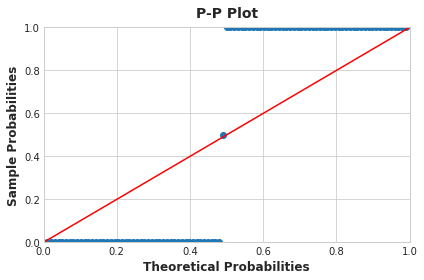

In [31]:
# P-P plot
def pp_plot(model, title):
    plt.figure(figsize=(8,6))
    probplot = sm.ProbPlot(model.resid)
    probplot.ppplot(line='45')
    plt.title(title)
    plt.show()
pp_plot(sm_model2, 'P-P Plot')

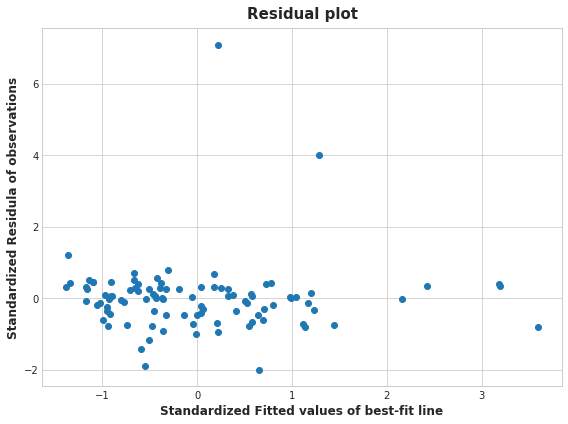

In [32]:
def get_std_values(val):
    std_val = (val - val.mean())/val.std()
    return std_val

# Residule plot
def residual_plot(fitted, residual, title):
    plt.figure(figsize=(8,6))
    plt.scatter(get_std_values(fitted),
                get_std_values(residual))
    plt.title(title, fontsize=15)
    plt.xlabel("Standardized Fitted values of best-fit line")
    plt.ylabel("Standardized Residula of observations")
    plt.show()
    
residual_plot(sm_model2.fittedvalues, sm_model2.resid, 'Residual plot')

>  As per the residulas plot there are couple of outliers that are affecting the model.

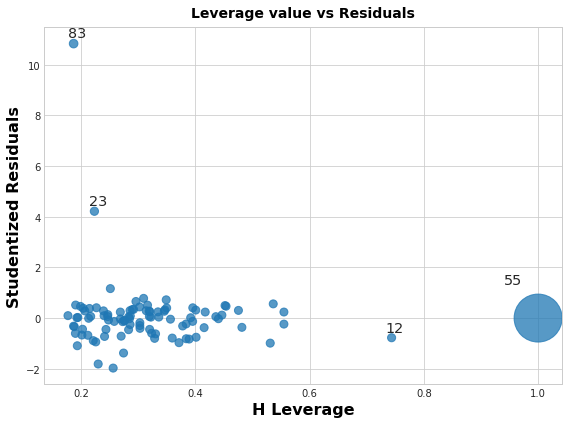

In [33]:
#influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(sm_model2, ax=ax)
plt.title('Leverage value vs Residuals')
plt.show()

> index number 55 has higher leverage on residuals compared to others

# LR, Ridge, Decision tree & SGD

In [34]:
# Models dict
X_trn = train_X[new_lis].drop('const', axis=1)
X_tst = val_X[new_lis].drop('const', axis=1)
train_y, val_y

def model_function(mod,**kwargs):
    model = mod(**kwargs)
    model.fit(X_trn,train_y)
    pre_y = model.predict(X_tst)
    RMSE = round(np.sqrt(mean_squared_error(pre_y,val_y)), 3)
    R2 = round(r2_score(pre_y,val_y)*100, 3)
    return RMSE, R2
    
print("RMSE and R2 of Linear regression model are: ", 
      model_function(LinearRegression, normalize=True))

RMSE and R2 of Linear regression model are:  (87902.764, 96.371)


In [35]:
#Ridge regression
print("RMSE and R2 of Ridge regression model are: ", model_function(Ridge, alpha=0.15))

RMSE and R2 of Ridge regression model are:  (84222.506, 96.655)


In [36]:
#SGD regression
print("RMSE and R2 of SGD regression model are: ", model_function(SGDRegressor, early_stopping=True))

RMSE and R2 of SGD regression model are:  (9.696225277488219e+20, -44.568)


In [37]:
#Decision tree regression
print("RMSE and R2 of Decision tree regression model are: ", 
      model_function(DecisionTreeRegressor, max_features='auto', random_state=0))

RMSE and R2 of Decision tree regression model are:  (397666.493, 37.026)


> **>  Best performer is RIDGE Regresison model with accuracy of 96.65%**

# Thank you for visiting this notebook! If you liked please UPVOTE! and do not forget to leave feedback! because your feedback matters